# CREDIT CARD FRAUD DETECTION

### Step 1: Import Libraries
Import the required libraries for data analysis, visualization, and machine learning

In [1]:
# Required Libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling dataframes
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score,
                             recall_score, f1_score, matthews_corrcoef, confusion_matrix)
import pickle  # For saving the model and preprocessed data

### Step 2: Load and Preview the Data
Load the dataset and preview the first 10 rows.

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\manas\OneDrive\Desktop\Financial A\creditcard.csv")

# Display the first 10 rows of the dataset
data.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


##### Time: Represents the time elapsed between transactions. This attribute helps in analyzing transaction patterns over time.
##### V1-V28: These are anonymized features resulting from principal component analysis (PCA) to protect the confidentiality of sensitive information. They represent various transaction parameters such as transaction amounts, merchant IDs, and other transaction-related details.
##### Amount: Denotes the transaction amount involved in each credit card transaction. This attribute provides valuable information about the financial aspect of the transaction.
##### Class: Indicates whether a transaction is fraudulent or legitimate. It is a binary attribute where ‘1’ typically represents a fraudulent transaction, and ‘0’ represents a legitimate one. This attribute serves as the target variable for the fraud detection model.


### Step 3: Check for Missing Values
Identify and handle any missing values in the dataset.

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Step 4: Explore Class Distribution
Separate the fraud cases (Class = 1) and valid transactions (Class = 0) to understand the data imbalance.

In [4]:
# Separate fraud and valid transactions
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

# Calculate the outlier fraction
outlierFraction = len(fraud) / float(len(valid))

# Display counts and outlier fraction

print("Outlier Fraction: {:.4f}".format(outlierFraction))
print("Fraud Cases: {}".format(len(fraud)))
print("Valid Transactions: {}".format(len(valid)))


Outlier Fraction: 0.0017
Fraud Cases: 492
Valid Transactions: 284315


Fraudulent transactions are significantly fewer than valid ones, highlighting a class imbalance problem.

### Step 5: Prepare Data for Model
Separate features (X) and the target variable (Y), and convert them to NumPy arrays

In [5]:
# Features (X) and Target (Y)
X = data.drop(['Class'], axis=1)  # All columns except 'Class'
Y = data['Class']  # Target column

# Print shapes of X and Y
print("Feature set shape:", X.shape)
print("Target set shape:", Y.shape)

# Convert to NumPy arrays
xData = X.values
yData = Y.values

Feature set shape: (284807, 30)
Target set shape: (284807,)


### Step 6: Train-Test Split
Split the data into training(80%) and testing sets(20%)

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)

### Step 7: Train a Random Forest Classifier
Fit the Random Forest classifier on the training data.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)


# Predict on the test set
yPred = rfc.predict(xTest)

### Step 8: Evaluate the Model
Use various metrics to evaluate the model's performance.

In [8]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Calculate metrics
acc = accuracy_score(yTest, yPred)
prec = precision_score(yTest, yPred)
rec = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
MCC = matthews_corrcoef(yTest, yPred)

# Print evaluation metrics
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)
print("Matthews Correlation Coefficient:", MCC)

Accuracy: 0.9995786664794073
Precision: 0.9625
Recall: 0.7857142857142857
F1-Score: 0.8651685393258427
Matthews Correlation Coefficient: 0.8694303688259544


### Step 9: Visualize the Confusion Matrix
Plot the confusion matrix to better understand the model's predictions.

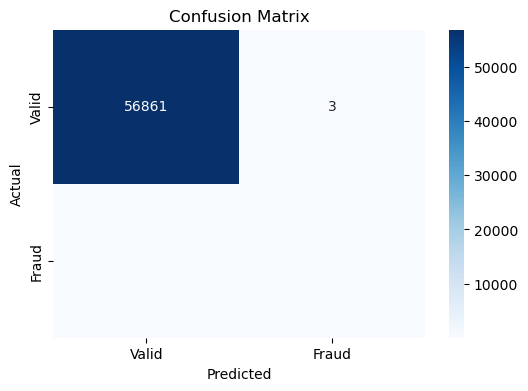

In [9]:
# Confusion Matrix
cm = confusion_matrix(yTest, yPred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Save the trained model and processed data for Streamlit dashboard
with open("model.pkl", "wb") as model_file:
    pickle.dump(rfc, model_file)
    
X.to_csv("features.csv", index=False)
Y.to_csv("target.csv", index=False)
print("Model and data files saved successfully!")

Model and data files saved successfully!
